In [1]:
#importing the libraries
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
import numpy as np
from scipy.stats import wasserstein_distance

In [2]:
#Computing the Wasserstein Distance between two images
def dist(im1,im2):
    #Converting PIL to Tensor
    transform = transforms.Compose([transforms.ToTensor()])
    img1  = transform(im1)
    img2  = transform(im2)
    
    lc_img1 = [img1[c] for c in range(3)]
    lc_img2 = [img2[c] for c in range(3)]
    
    #Computing the histogram for each channel of the two images
    h_img1 = [torch.histc(lc_img1[c], bins=100, min=0.0,max=1.0) for c in range(3)]
    h_img2 = [torch.histc(lc_img2[c], bins=100, min=0.0,max=1.0) for c in range(3)]
    
    dist = []
    #Computing the Wasserstein Distance for each channel between two images
    for c in range(3):
        a = h_img1[c].div(h_img1[c].sum())
        b = h_img2[c].div(h_img2[c].sum())
        d = wasserstein_distance(a,b)
        dist.append(d)
    return dist
        
        
    

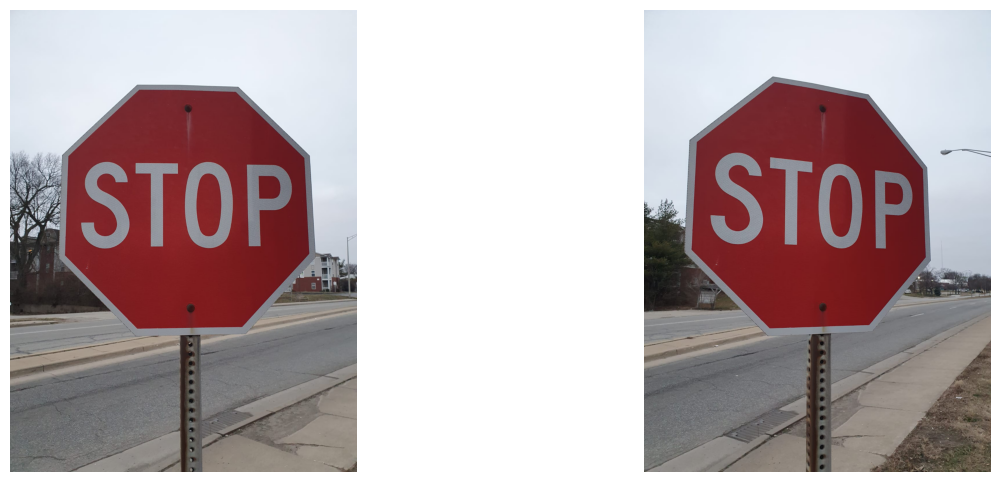

In [3]:
#Printing the two input images
fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.axis('off')
ax2.axis('off')

im1 = Image.open('I1.jpeg')
img1 = np.asarray(im1)
ax1.imshow(img1)

im2 = Image.open('I2.jpeg')
img2 = np.asarray(im2)
ax2.imshow(img2)


In [4]:
#Performing projective transform on the right image to return the left image
end_pt = [[180,503],[1037,504],[169,859],[1057,857]]
start_pt = [[158,450],[979,546],[140,840],[991,869]]

transf_im2 =  transforms.functional.perspective(im2,start_pt,end_pt)

(-0.5, 1199.5, 1599.5, -0.5)

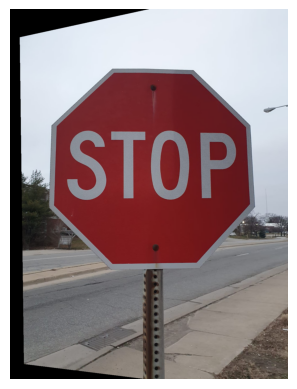

In [5]:
#The transformed right image
plt.imshow(np.asarray(transf_im2))
plt.axis("off")

In [6]:
#Wasserstein Distance between the original two images for all the three channels
dist(im1,im2)

[0.0013495103830609876, 0.0012694791786270801, 0.0009966562065164906]

In [7]:
#Wasserstein Distance between the transformed image for all the three channels
dist(im1,transf_im2)

[0.0012242603535764826, 0.0010014792433685217, 0.0008933854644601524]